# Regresión Logística EDA #

Para los ejercicios de pair programming de Regresión logística temdremos que buscar un dataset (al igual que hicismos en regresión lineal) que usaremosmos a lo largo de los siguientes ejercicios.


Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

Objetivos

- Buscar un conjunto de datos a analizar
- Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico.
- Explicar los datos y las variables disponibles en el conjunto de datos seleccionado
- Realizar un EDA sencillo poniendo en práctica los conocimientos adquiridos hasta el momento.
- Interpretación de los resultados.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/Churn_Modelling.csv", index_col = 0)
df.head(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


- Nuestro modelo irá dirigido a predecir si un cliente se irá de la compañía o no, por lo tanto, nnuestra V.respuesta será "exited", donde "1" será que se han ido y "0" será que son clientes.

- Análisis exploratorio

In [3]:
df.shape

(10000, 13)

In [4]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
df.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

- Observamos que no tenemos variables redundantes. 

In [8]:
df.columns


Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

<AxesSubplot:xlabel='Exited', ylabel='count'>

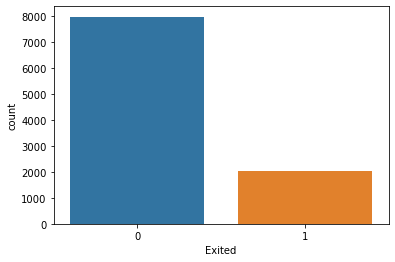

In [9]:
#Vamos a ver la distribución de nuestra v.respuesta:
sns.countplot(data= df, x = 'Exited')

- En esta gráfica observamos que son muchos menos los clientes que se han ido de la compañía. (Alrededor de unos 2000)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [11]:
df.describe(include = "object").T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [12]:
# Eliminmos columnas que no serán relevantes para el modelo.
# Borraremos el apellido, ya que no nos interesa quien se va, si no caracteristicas comunes entre las personas que se van. 
# Otra columna que borraremos es Customer ID, que viene siendo lo mismo, el iddentificador del cliente que se va o se queda. 
df.drop(['CustomerId', 'Surname'], axis = 1, inplace = True)
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [15]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [13]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [17]:
columnas_categoria = ["Gender", "Geography"]

for i in columnas_categoria:
    df[i] = df[i].astype("category")

In [18]:
df.dtypes

CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited                int64
dtype: object

- Análisis exploratorio visual

<AxesSubplot:xlabel='Exited', ylabel='count'>

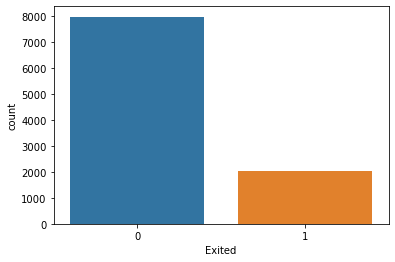

In [19]:
#Vamos a ver la distribución de nuestra v.respuesta:
sns.countplot(data= df, x = 'Exited')

In [22]:
(df["Exited"].value_counts() / df.shape[0]) * 100

0    79.63
1    20.37
Name: Exited, dtype: float64

Vemos que el porcentaje de personas que han dejado la compañía es del 20.37 , frente a un 79.63% de clientes fidelizados

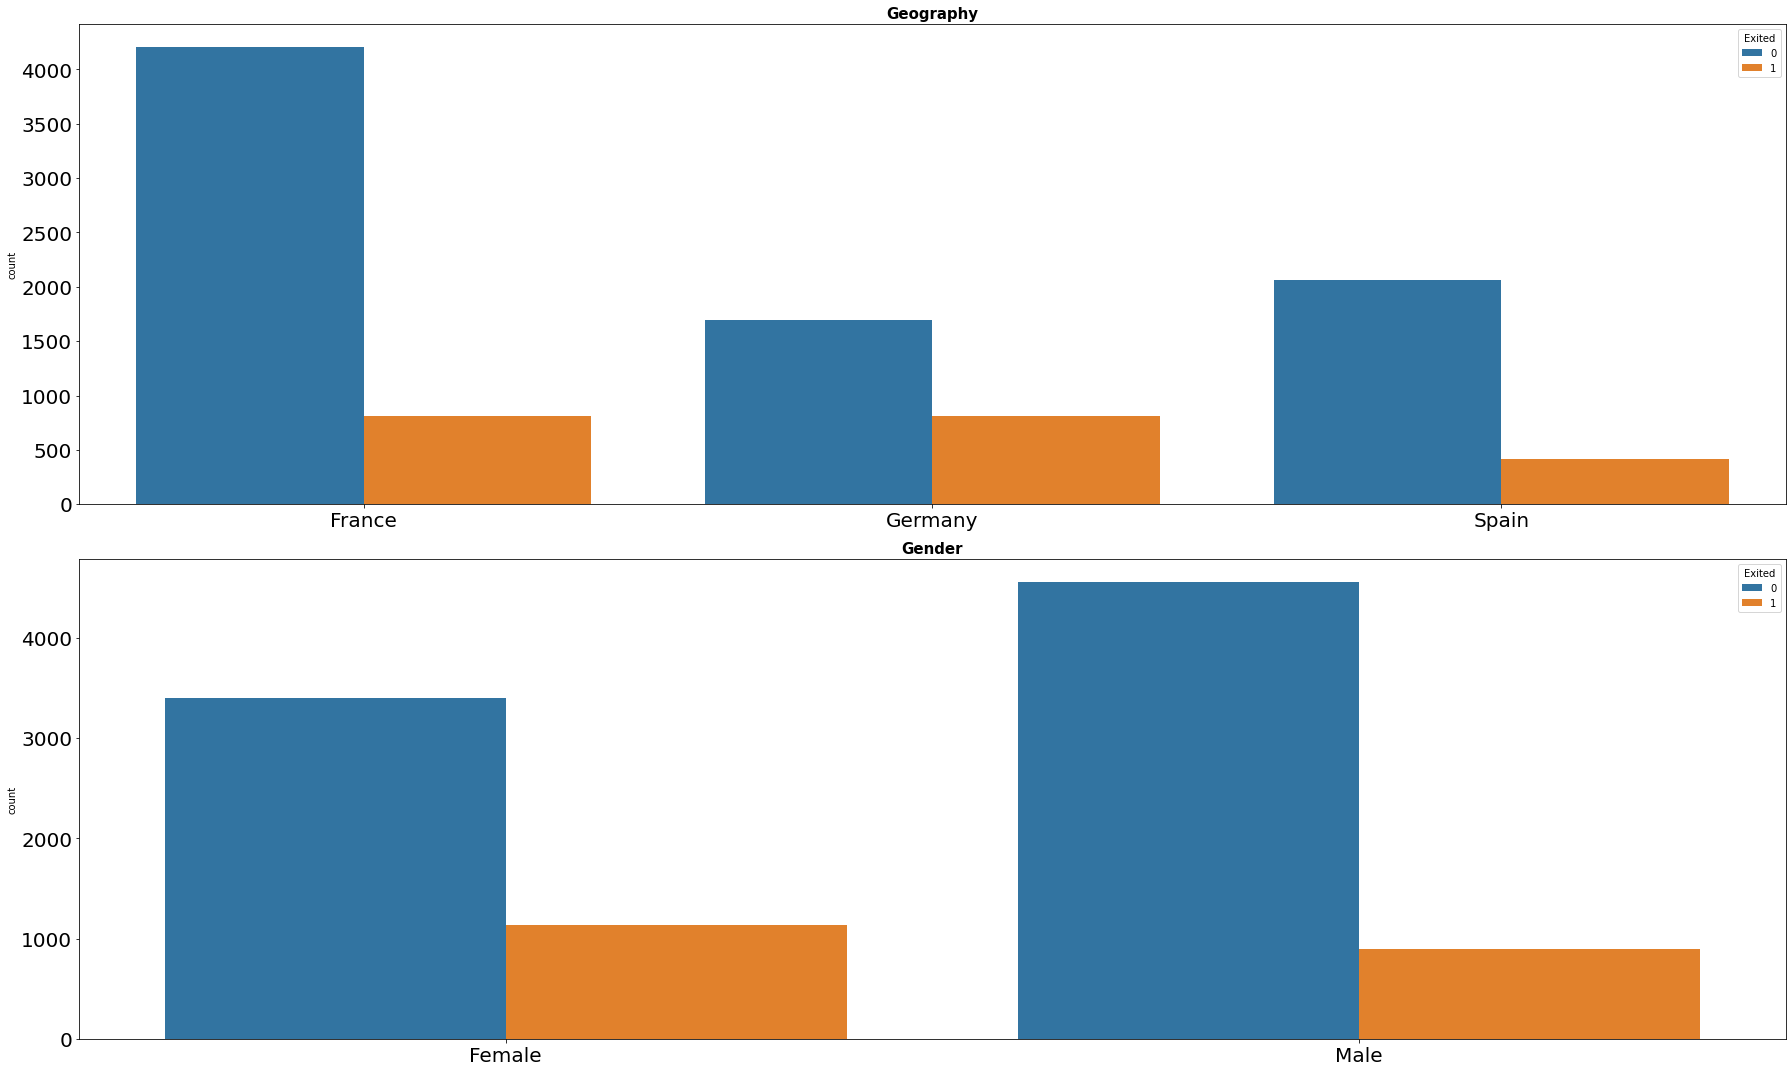

In [75]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (25, 15))

axes = axes.flat
columnas_cat = df.select_dtypes(include = "category").columns

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "Exited",
        alpha = 1, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")



fig.tight_layout();

- De esta gráfica donde relacionamos nuestra v.respuesta con las categoricas podemos intuir:
    - El país donde más clientes tenemos es Francia. 
    - ¿Qué pasa en Alemania? Es dónde menos clientes tenemos pero mayor porcentaje de "fugas" tenemos. 
    - La mayor parte de clientes son Hombres, y al mismo tiempo son los que más contentos estarían con nuestros servicios. 

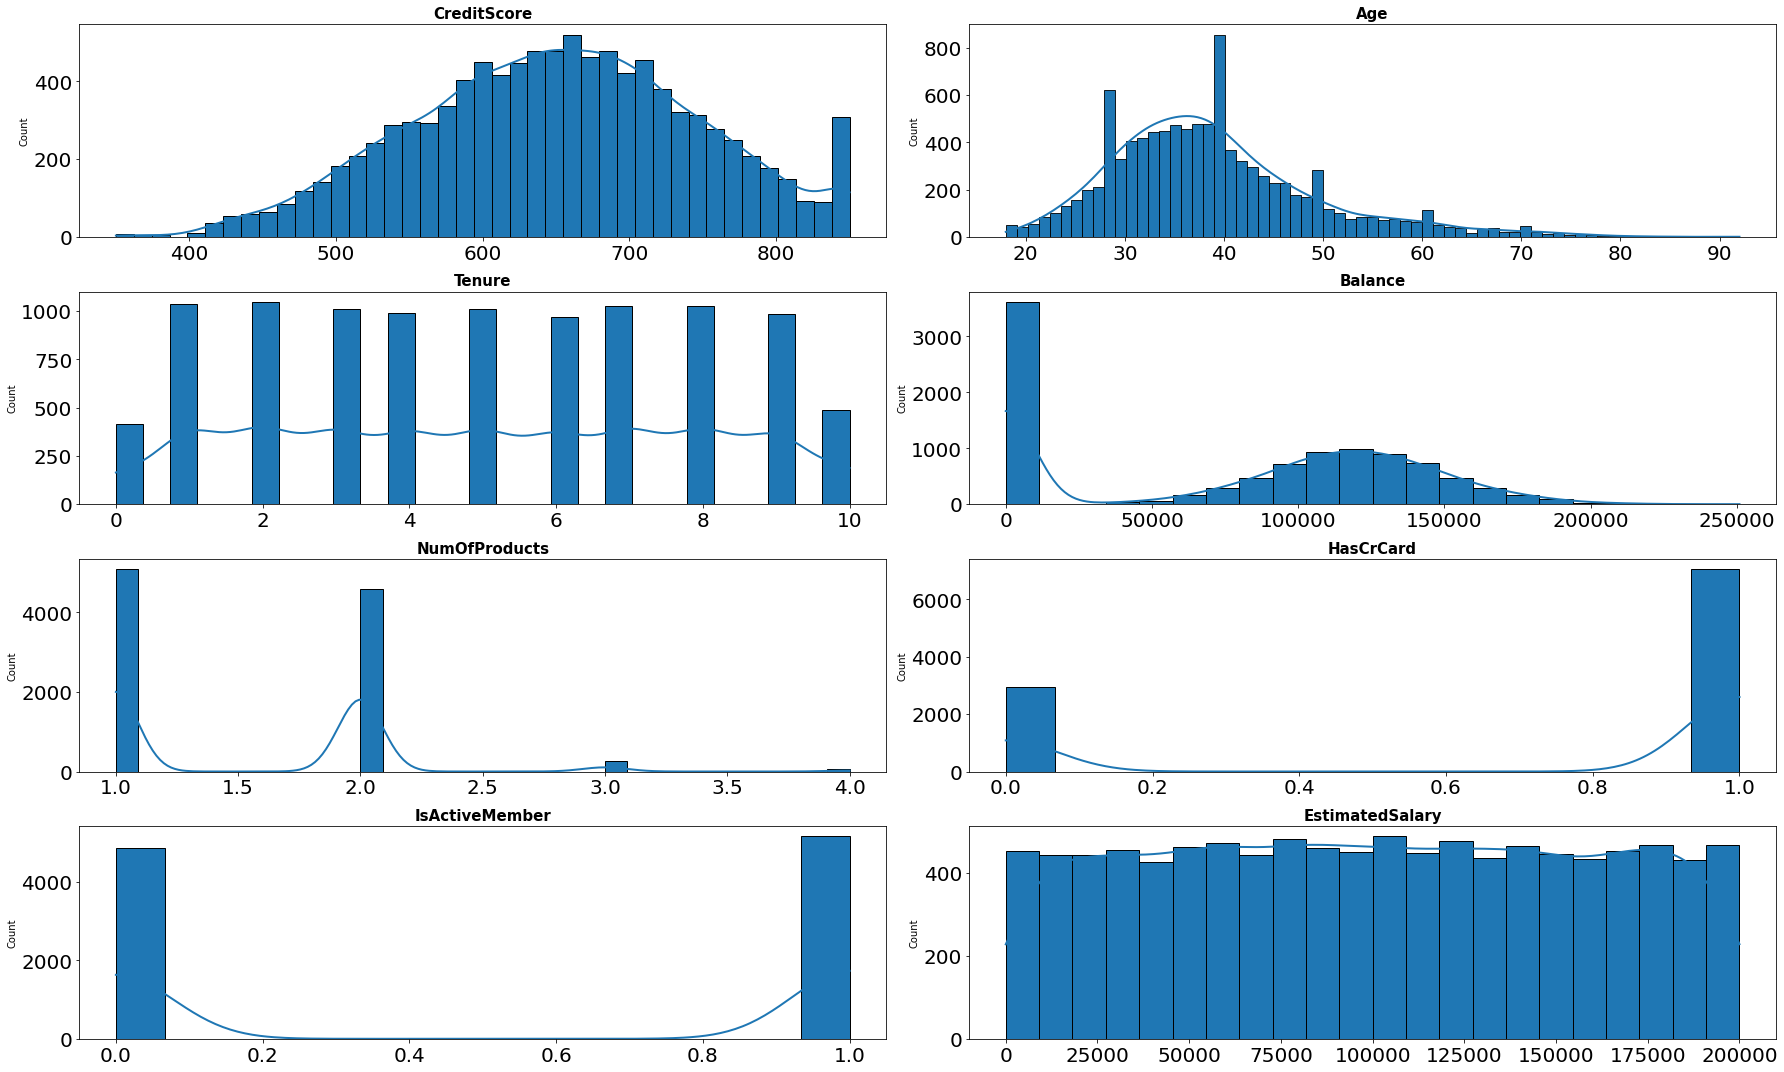

In [33]:
# Gráfico de distribución para cada variable numérica

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (25, 15))

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("Exited")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        line_kws = {"linewidth": 2}, 
        alpha = 1, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout();

In [62]:
df.columns


Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

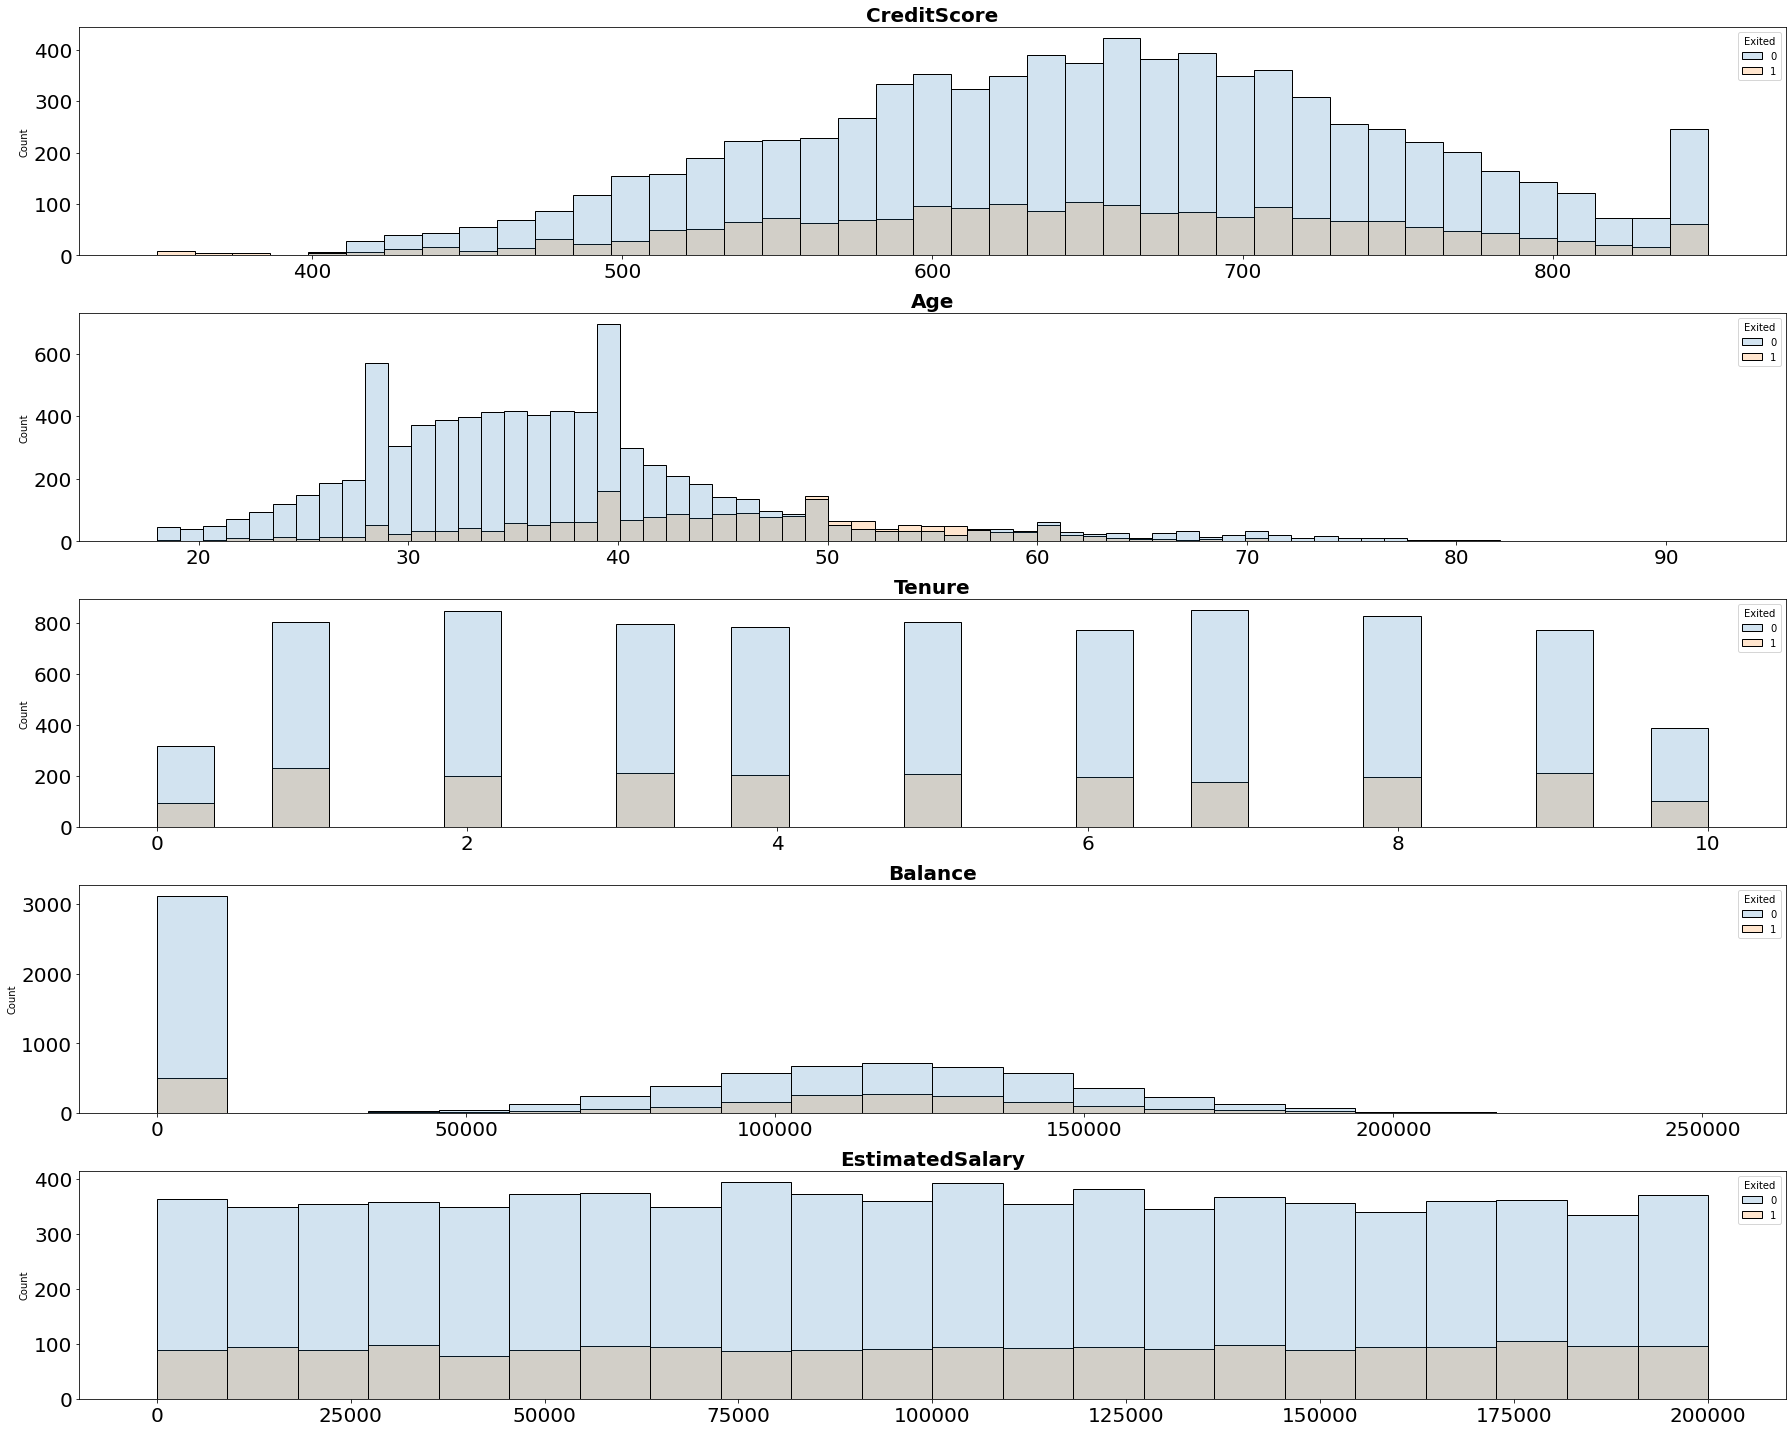

In [69]:
# Gráfico de distribución para cada variable numérica relacionada con los clientes que se van
# ==============================================================================

fig, axes = plt.subplots(nrows = 5, ncols = 1, figsize = (25, 20))


axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop(['NumOfProducts','Exited', 'HasCrCard', 'IsActiveMember'])

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        hue = "Exited", 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 20, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout();

In [67]:
df_numericas = df.select_dtypes(include = np.number)

- Tenure = Permanencia cliente 
- Balance = activos/pasivos, lo que ingreso, gasto interés

In [73]:
df_numericas.sample(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,
4834,762,32,10,191775.65,1,1,0,179657.83,0
5048,471,26,8,0.00,2,1,1,179655.87,0
260,850,38,3,54901.01,1,1,1,140075.55,0
6258,774,36,9,130809.77,1,1,0,152290.28,0
5973,548,49,9,108437.89,1,0,0,127022.87,1
592,700,38,8,134811.30,1,1,0,1299.75,0
8182,598,28,8,129991.76,2,0,1,46041.08,0
6238,630,28,1,0.00,2,1,1,133267.78,0
4728,648,19,1,0.00,2,0,1,22101.86,0


In [46]:
correlacion = df_numericas.corr()
correlacion

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


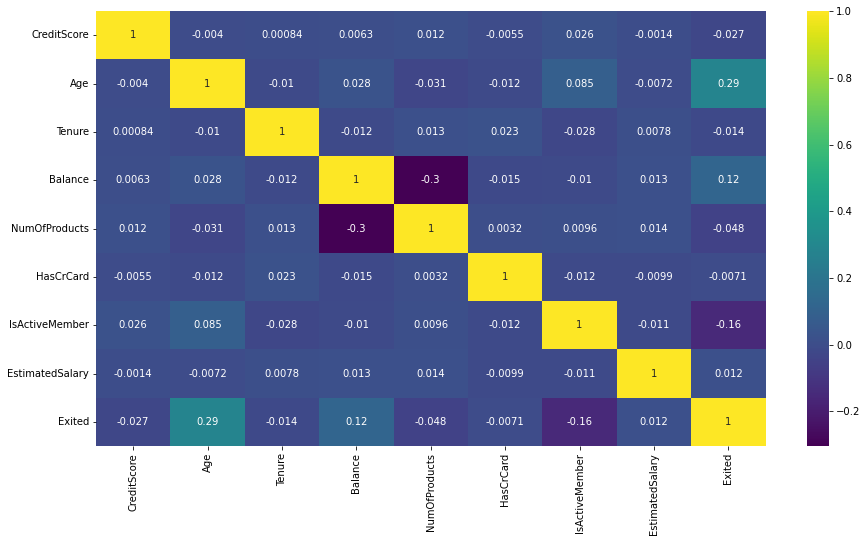

In [72]:
plt.figure(figsize=(15,8))
sns.heatmap(correlacion, cmap="viridis", annot = True);

- Veamos nuestros outliers:

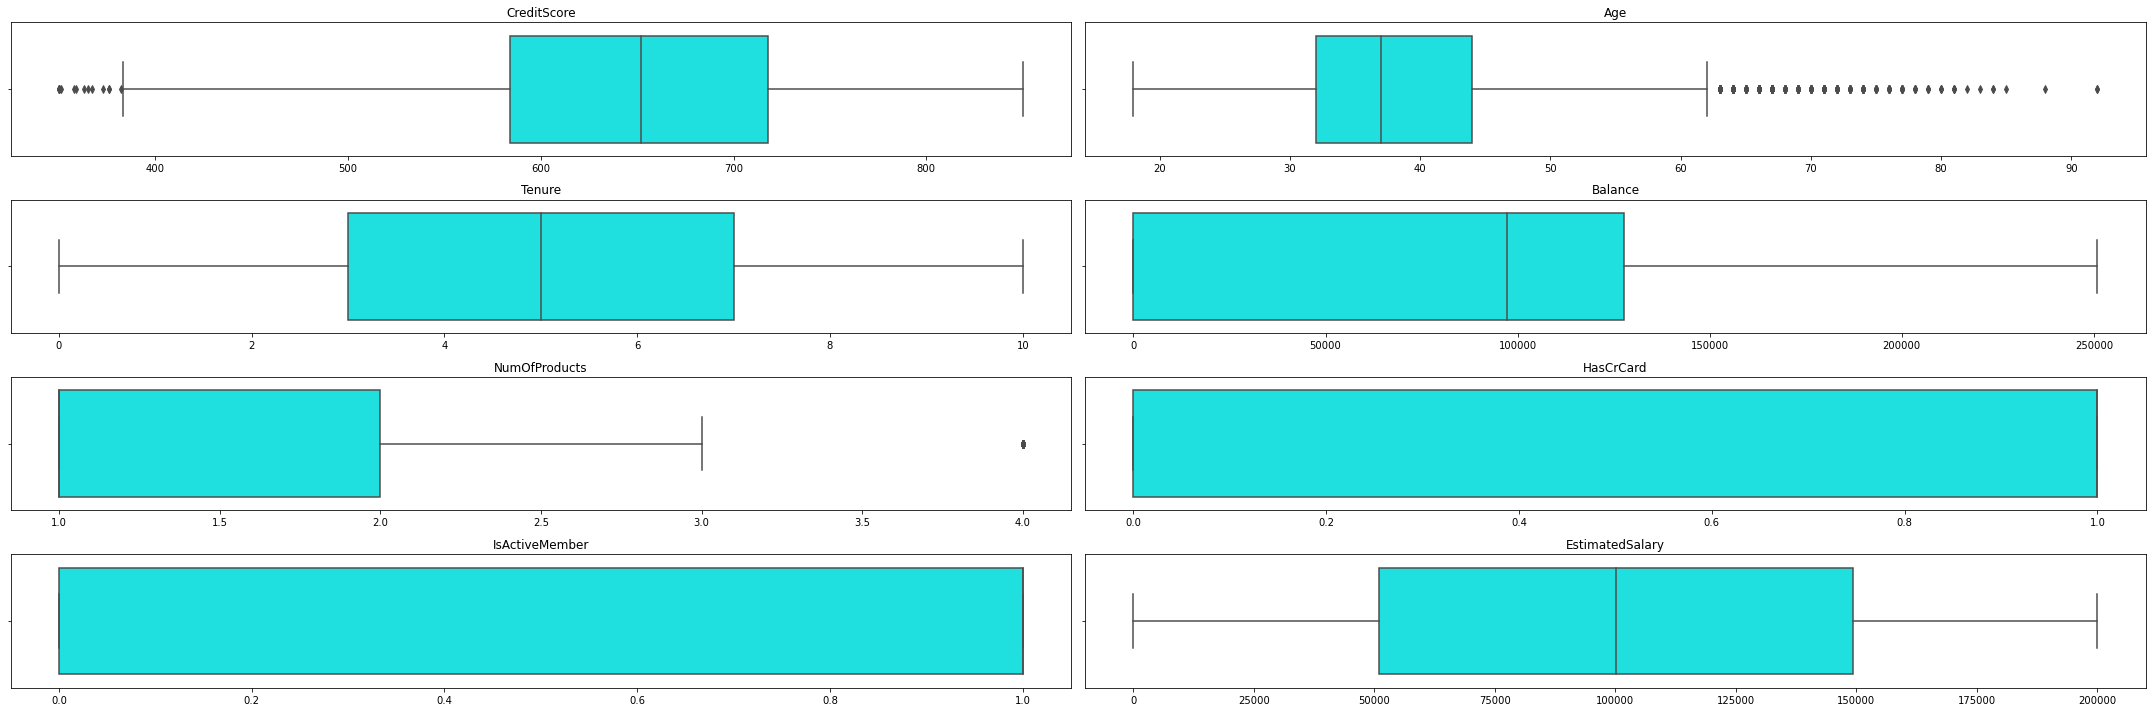

In [61]:
fig, axes = plt.subplots(4, 2, figsize=(30,10))

categorias = df_numericas.drop("Exited", axis = 1).columns

axes = axes.flat

for indice, cate in enumerate(categorias):

    sns.boxplot(x = df[cate], data = df, ax=axes[indice], color = "cyan"); # para trazar una línea de densidad

    axes[indice].set_title(cate)
    axes[indice].set_xlabel("")

fig.tight_layout();

In [56]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [59]:
lista_columnas = df_numericas.columns.drop("Exited")
lista_columnas

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [71]:
ind = detectar_outliers(lista_columnas, df)

- Del análisis de los outliers podemos observar que las únicas variables donde tenemos es en edad, CreditScore y NumOfProducts.
- En Credit Score son bastante pocos los que tenemos.


In [76]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [77]:
df.to_csv("data/Churn_modelling_eda.csv")